In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('E:\Data Science 2.0 Course Prectice\Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(400, 9)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
x =df.iloc[:,:-1]
y = df['Chance of Admit ']

In [15]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
x_train = scaler.fit_transform(x_train)

In [21]:
x_test = scaler.transform(x_test)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

In [24]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [30]:
history  = model.fit(x_train,y_train,epochs=250,validation_split=0.20)

Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0068
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - val_loss: 0.0065
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - val_loss: 0.0063
Epoch 9/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 10/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 11/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 12/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 0.0058


In [31]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_pred,y_test)

0.7008957511788294

In [34]:
import matplotlib.pyplot as plt

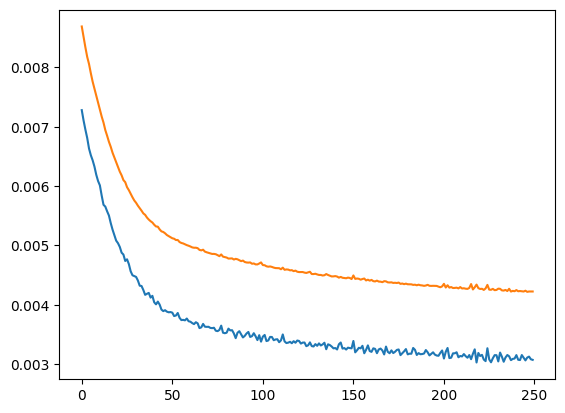

In [37]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [36]:
history.history

{'loss': [0.008690191432833672,
  0.008514607325196266,
  0.008338449522852898,
  0.00817770417779684,
  0.008057954721152782,
  0.007902528159320354,
  0.007760373409837484,
  0.007641255389899015,
  0.007528125774115324,
  0.00739647401496768,
  0.007284686900675297,
  0.007171653676778078,
  0.007070526015013456,
  0.0069436016492545605,
  0.006848387885838747,
  0.00674635823816061,
  0.0066618286073207855,
  0.006562001537531614,
  0.006481526885181665,
  0.006399749778211117,
  0.006325067486613989,
  0.0062432680279016495,
  0.006181254982948303,
  0.0061010075733065605,
  0.006066034082323313,
  0.005981307476758957,
  0.005931156221777201,
  0.005870756693184376,
  0.005811078939586878,
  0.005757316946983337,
  0.005718044936656952,
  0.0056692766956985,
  0.005627921782433987,
  0.005585761275142431,
  0.005539471749216318,
  0.005514974240213633,
  0.005469388794153929,
  0.005435724277049303,
  0.005407906137406826,
  0.005385758355259895,
  0.00534840626642108,
  0.005319